In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'c:diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(47931, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47931 entries, 0 to 47930
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    47931 non-null  float64
 1   cut      47931 non-null  object 
 2   color    47931 non-null  object 
 3   clarity  47931 non-null  object 
 4   depth    47931 non-null  float64
 5   table    47931 non-null  float64
 6   price    47931 non-null  int64  
 7   x        47931 non-null  float64
 8   y        47931 non-null  float64
 9   z        47931 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

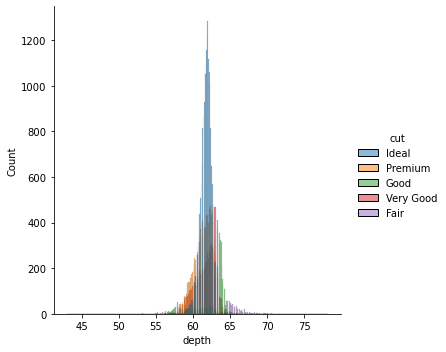

In [7]:
sns.displot(data=df, x='depth', hue='cut')

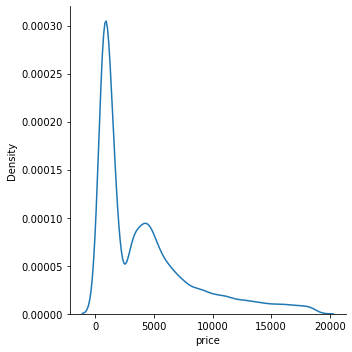

In [8]:
sns.displot(data=df,x='price',kind='kde')

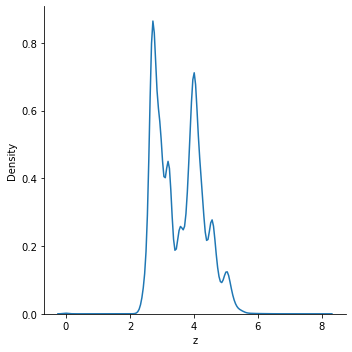

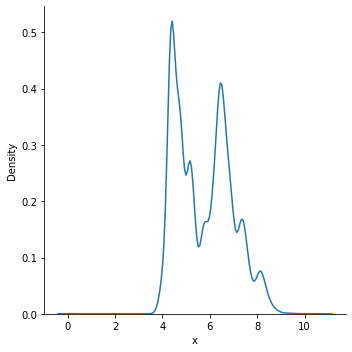

In [9]:
sns.displot(data=df, x='z',kind='kde')
sns.displot(data=df, x='x',kind='kde')

<AxesSubplot:xlabel='price'>

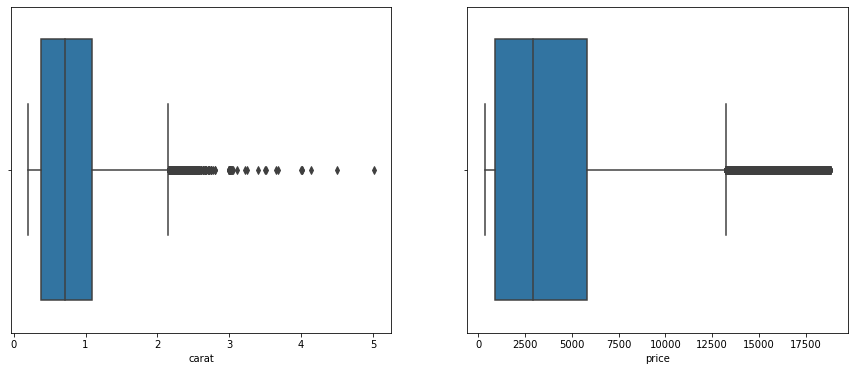

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.boxplot(data=df, x='carat')
plt.subplot(122)
sns.boxplot(data=df, x='price')

<AxesSubplot:xlabel='table'>

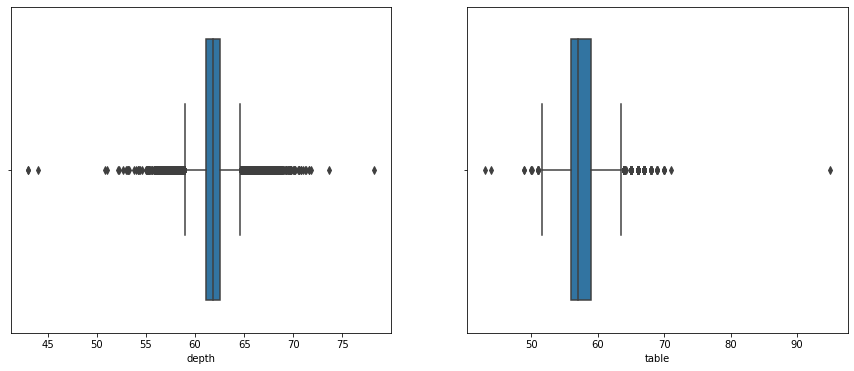

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.boxplot(data=df, x='depth')
plt.subplot(122)
sns.boxplot(data=df, x='table')

<AxesSubplot:xlabel='clarity', ylabel='count'>

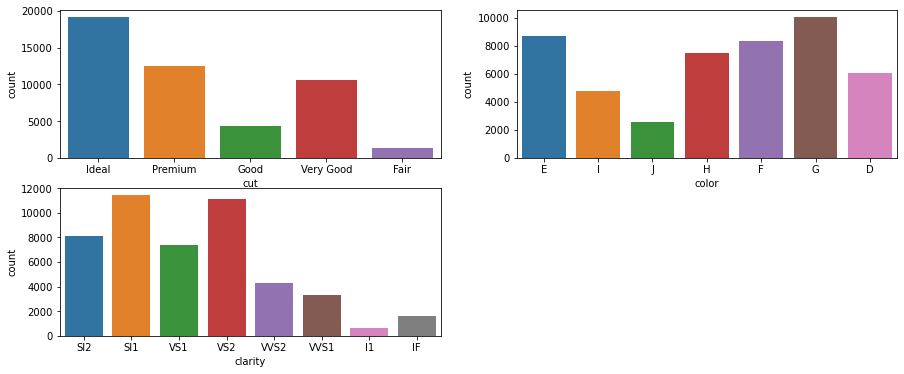

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(221)
sns.countplot(data=df, x='cut')
plt.subplot(222)
sns.countplot(data=df, x='color')
plt.subplot(223)
sns.countplot(data=df, x='clarity')

<AxesSubplot:xlabel='table', ylabel='price'>

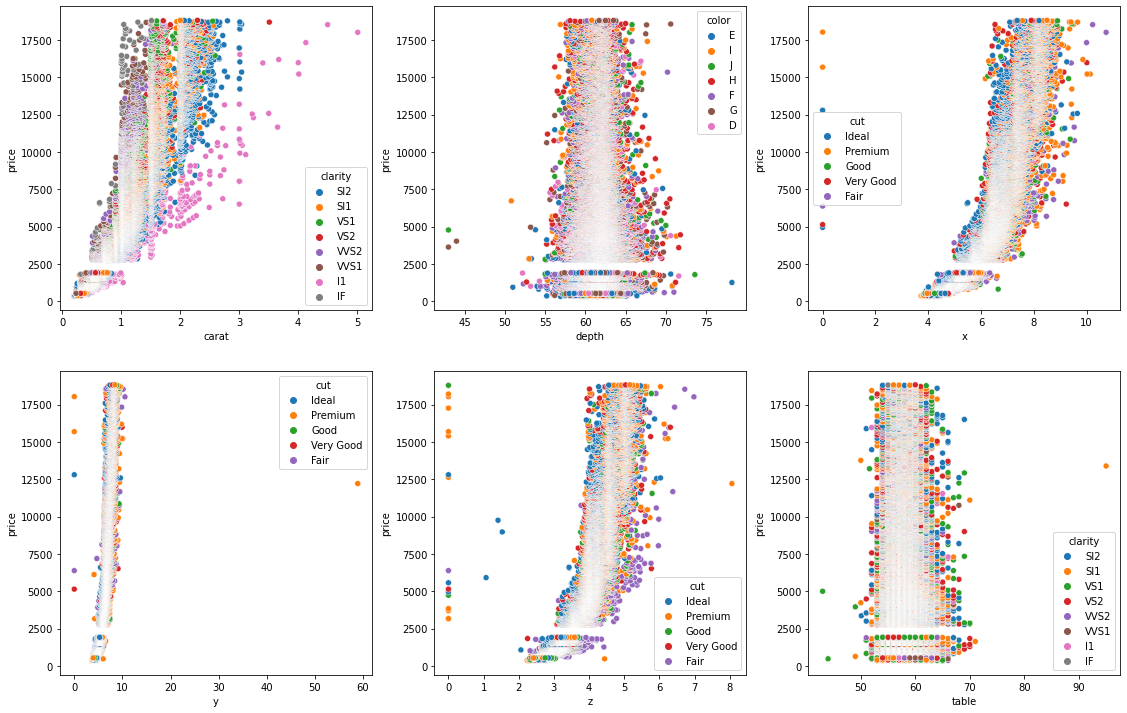

In [13]:
plt.figure(figsize=(19,19))
plt.subplot(331)
sns.scatterplot(data=df, x='carat',y='price',hue='clarity')
plt.subplot(332)
sns.scatterplot(data=df, x='depth', y='price',hue='color')
plt.subplot(333)
sns.scatterplot(data=df, x='x', y='price', hue='cut')
plt.subplot(334)
sns.scatterplot(data=df, x='y', y='price', hue='cut')
plt.subplot(335)
sns.scatterplot(data=df, x='z', y='price', hue='cut')
plt.subplot(336)
sns.scatterplot(data=df, x='table', y='price', hue='clarity')

<AxesSubplot:xlabel='cut', ylabel='z'>

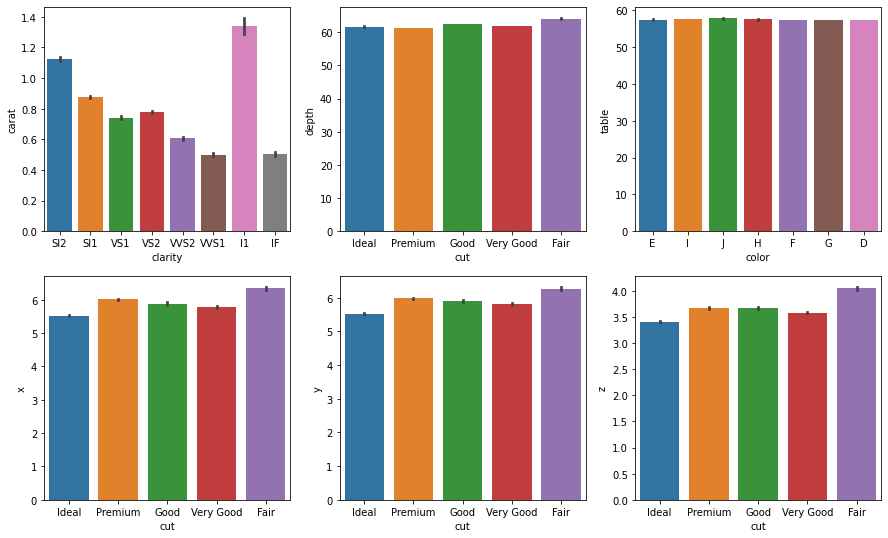

In [14]:
plt.figure(figsize=(15,14))
plt.subplot(331)
sns.barplot(data=df, x='clarity', y='carat')
plt.subplot(332)
sns.barplot(data=df, x='cut', y='depth')
plt.subplot(333)
sns.barplot(data=df, x='color', y='table')
plt.subplot(334)
sns.barplot(data=df, x='cut', y='x')
plt.subplot(335)
sns.barplot(data=df, x='cut', y='y')
plt.subplot(336)
sns.barplot(data=df, x='cut', y='z')

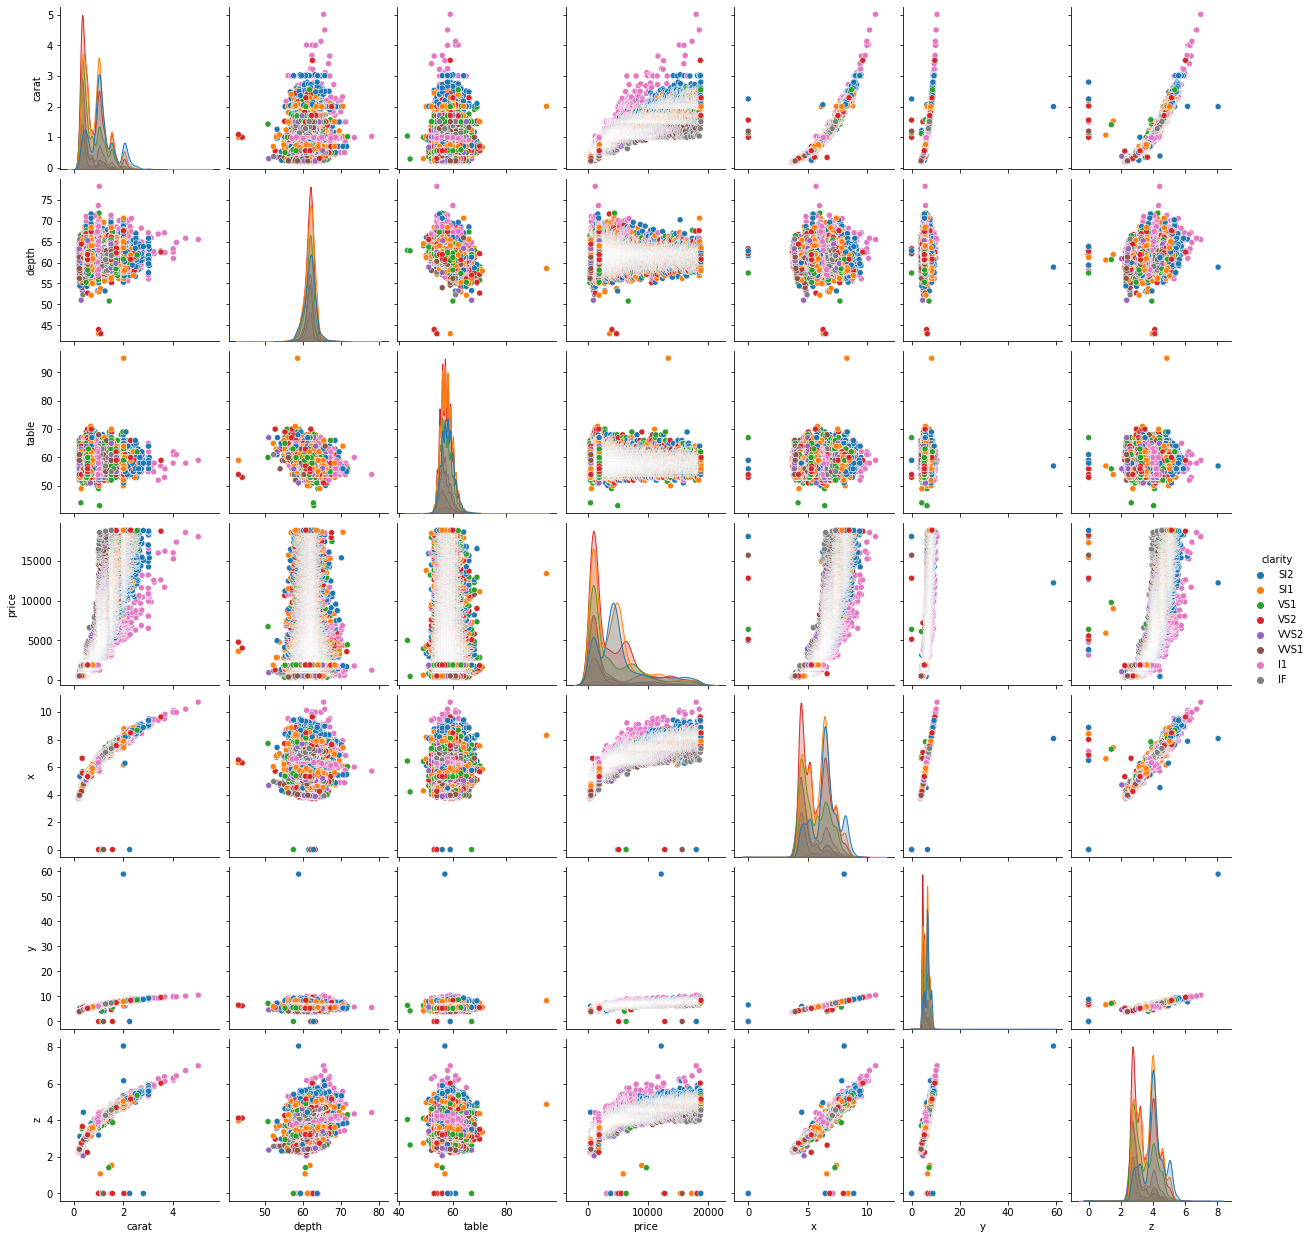

In [15]:
sns.pairplot(data=df, hue='clarity')

In [16]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [17]:
target=df['price']
inputs=df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]

## Splitting in to Train & Test 

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(inputs, target, train_size=0.75, random_state=100)

In [19]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
11155,1.21,Very Good,H,SI1,63.5,58.0,6.73,6.63,4.24
18305,1.05,Ideal,G,VS1,62.8,58.0,6.44,6.48,4.06
9699,0.40,Good,J,VS1,63.5,56.0,4.69,4.70,2.98
43599,0.30,Ideal,H,VS1,62.1,57.0,4.27,4.30,2.66
46382,0.54,Ideal,D,VS2,60.9,56.0,5.30,5.27,3.22
...,...,...,...,...,...,...,...,...,...
16304,1.07,Very Good,G,VS2,62.9,59.0,6.49,6.52,4.09
79,0.26,Very Good,E,VVS1,62.6,59.0,4.06,4.09,2.55
12119,0.91,Premium,G,VVS2,61.8,58.0,6.24,6.16,3.83
14147,1.25,Premium,I,SI1,62.4,58.0,6.89,6.85,4.29


In [20]:
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(35948, 9) (35948,)
(11983, 9) (11983,)


In [21]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
11155,1.21,Very Good,H,SI1,63.5,58.0,6.73,6.63,4.24
18305,1.05,Ideal,G,VS1,62.8,58.0,6.44,6.48,4.06
9699,0.40,Good,J,VS1,63.5,56.0,4.69,4.70,2.98
43599,0.30,Ideal,H,VS1,62.1,57.0,4.27,4.30,2.66
46382,0.54,Ideal,D,VS2,60.9,56.0,5.30,5.27,3.22


## Data preparation on Train data 

In [22]:
# Label_encoding the categorical column 'cut' (Fair, Good, Very Good, Premium, Ideal)
label_encoder={'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}

X_train['cut']=X_train['cut'].apply(lambda x: label_encoder[x])

X_train['cut'].head()

11155    2
18305    4
9699     1
43599    4
46382    4
Name: cut, dtype: int64

In [23]:
# Label_encoding the categorical column 'color' based on J(worst) to D(best).
label_encoder={'D':0,'E':1,'F':2,'G':3,'H':4,'I':5,'J':6}
X_train['color']=X_train['color'].apply(lambda x: label_encoder[x])
X_train['color'].head()

11155    4
18305    3
9699     6
43599    4
46382    0
Name: color, dtype: int64

In [24]:
# Label_encoding the categrical column 'clarity' based on(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
label_encoder = {'IF':0, 'VVS1':1, 'VVS2':2, 'VS1':3, 'VS2':4, 'SI1':5, 'SI2':6, 'I1':7}
X_train['clarity']=X_train['clarity'].apply(lambda x: label_encoder[x])
X_train['clarity'].head()

11155    5
18305    3
9699     3
43599    3
46382    4
Name: clarity, dtype: int64

In [25]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
11155,1.21,2,4,5,63.5,58.0,6.73,6.63,4.24
18305,1.05,4,3,3,62.8,58.0,6.44,6.48,4.06
9699,0.40,1,6,3,63.5,56.0,4.69,4.70,2.98
43599,0.30,4,4,3,62.1,57.0,4.27,4.30,2.66
46382,0.54,4,0,4,60.9,56.0,5.30,5.27,3.22


## Standardisation on numerical X_Train data 

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index= X_train.index)


In [27]:
X_train_scaled.head()

,carat,cut,color,clarity,depth,table,x,y,z
11155,0.787410,-0.824593,0.821363,0.641561,1.232822,0.250416,0.822283,0.719481,0.936502
18305,0.465273,0.978806,0.235209,-0.576536,0.738946,0.250416,0.575191,0.594289,0.688973
9699,-0.843408,-1.726292,1.993672,-0.576536,1.232822,-0.654411,-0.915882,-0.891312,-0.796203
43599,-1.044743,0.978806,0.821363,-0.576536,0.245070,-0.201998,-1.273740,-1.225155,-1.236255
46382,-0.561538,0.978806,-1.523255,0.032513,-0.601575,-0.654411,-0.396137,-0.415586,-0.466164


## Data preparation on Test data

In [28]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z
42341,0.41,Good,E,VVS1,64.1,55.0,4.71,4.68,3.01
8157,0.91,Ideal,G,SI2,61.0,57.0,6.25,6.28,3.82
37931,0.26,Very Good,H,VVS2,62.5,56.0,4.07,4.09,2.55
16341,2.21,Premium,H,I1,62.2,58.0,8.31,8.27,5.16
24524,1.90,Premium,F,SI2,62.9,61.0,7.78,7.73,4.88
...,...,...,...,...,...,...,...,...,...
18825,1.70,Very Good,J,SI1,59.1,61.0,7.79,7.85,4.62
3249,0.89,Very Good,F,SI2,60.2,60.0,6.18,6.21,3.73
7968,0.70,Ideal,D,VS1,61.4,57.0,5.71,5.76,3.52
20997,1.13,Ideal,G,VVS1,61.2,57.0,6.72,6.65,4.09


In [29]:
# Label_encoding the categorical column 'cut' based on (Fair, Good, Very Good, Premium, Ideal)
label_encoder={'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
X_test['cut']=X_test['cut'].apply(lambda x: label_encoder[x])
X_test['cut'].head()

42341    1
8157     4
37931    2
16341    3
24524    3
Name: cut, dtype: int64

In [30]:
# Label_encoding the categorical column 'color' based on J(worst) to D(best).
label_encoder={'D':0,'E':1,'F':2,'G':3,'H':4,'I':5,'J':6}
X_test['color']=X_test['color'].apply(lambda x: label_encoder[x])
X_test['color'].head()

42341    1
8157     3
37931    4
16341    4
24524    2
Name: color, dtype: int64

In [31]:
# Label_encoding the categrical column 'clarity' based on(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
label_encoder = {'IF':0, 'VVS1':1, 'VVS2':2, 'VS1':3, 'VS2':4, 'SI1':5, 'SI2':6, 'I1':7}
X_test['clarity']=X_test['clarity'].apply(lambda x: label_encoder[x])
X_test['clarity'].head()

42341    1
8157     6
37931    2
16341    7
24524    6
Name: clarity, dtype: int64

## standardization on numerical  X_test data

In [32]:
X_test_scaled= pd.DataFrame(scaler.transform(X_test),columns=X_test.columns, index=X_test.index)

In [33]:
X_test_scaled.head()

,carat,cut,color,clarity,depth,table,x,y,z
42341,-0.823274,-1.726292,-0.937100,-1.794633,1.656145,-1.106825,-0.898841,-0.908004,-0.754948
8157,0.183404,0.978806,0.235209,1.250609,-0.531022,-0.201998,0.413303,0.427368,0.358934
37931,-1.125277,-0.824593,0.821363,-1.185584,0.527285,-0.654411,-1.444148,-1.400423,-1.387522
16341,2.800766,0.077106,0.821363,1.859658,0.315623,0.250416,2.168509,2.088237,2.201652
24524,2.176626,0.077106,-0.350946,1.250609,0.809500,1.607657,1.716927,1.637549,1.816606


### KNN Regression

In [46]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()

knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [48]:
y_test_pred = knn_reg.predict(X_test)

In [49]:
temp_df = pd.DataFrame({'Actual':y_test,'predicted':y_test_pred})
temp_df.head()

,Actual,predicted
42341,1298,946.8
8157,4360,4120.2
37931,486,558.2
16341,6535,15427.2
24524,12812,9799.2


### Finding Root Mean Square for Knn_regression

In [50]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean squared Error:', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  495.75987649169656
Mean squared Error: 889697.5185879996
Root Mean Squared Error: 943.2377847541942
